In [6]:
import numpy as np
import matplotlib.pyplot as plt


In [7]:
"Les différentes instances"

def choice_instance(instance):
    
    global INSTANCE_NAME
    global NBR_MACHINES
    global NBR_WORKERS
    global QUALIFICATIONS

    if instance == "INSTANCE_1":
        INSTANCE_NAME = "Instance 1"
        NBR_MACHINES = 8
        NBR_WORKERS = 4
        QUALIFICATIONS = [[True, True, False, False, False, False, False, False], \
                          [False, False, True, True, False, False, False, False], \
                          [False, False, False, False, True, True, False, False], \
                          [False, False, False, False, False, False, True, True]]

    if instance == "INSTANCE_2":
        INSTANCE_NAME = "Instance 2"
        NBR_MACHINES = 8
        NBR_WORKERS = 4
        QUALIFICATIONS = [[True, False, True, False, False, True, False, False], \
                          [False, True, False, False, True, False, True, True], \
                          [False, True, False, True, True, False, False, True], \
                          [True, False, True, True, False, True, True, False]]

    if instance == "INSTANCE_3":
        INSTANCE_NAME = "Instance 3"
        NBR_MACHINES = 8
        NBR_WORKERS = 6
        QUALIFICATIONS = [[True, True, False, False, False, False, False, False], \
                          [False, False, True, False, False, False, False, False], \
                          [False, False, False, True, False, True, False, False], \
                          [False, False, False, False, True, False, False, True], \
                          [False, False, True, False, False, True, False, False], \
                          [True, False, False, False, False, False, True, False]]

    if instance == "INSTANCE_4":
        INSTANCE_NAME = "Instance 4"
        NBR_MACHINES = 8
        NBR_WORKERS = 6
        QUALIFICATIONS = [[True, True, True, False, False, False, False, False], \
                          [False, False, False, True, True, True, False, False], \
                          [True, False, True, False, False, True, True, True], \
                          [False, False, True, False, True, False, True, True], \
                          [False, True, False, False, False, True, True, False], \
                          [True, False, False, True, False, False, True, True]]

In [8]:
"Paramètres communs à toutes les instances"

NBR_PRODUCT_TYPES = 4
LAMBDAS = [0.29, 0.32, 0.47, 0.38]
ROUTES = [[0, 1, 2, 3, 7], [1, 3, 6], [2, 4, 0], [4, 5, 6, 7]]

LOWER_PT = [[0.58, 0.23, 0.81, 0.12, 0, 0, 0, 0.82], [0, 0.59, 0, 0.74, 0, 0, 0.30, 0], \
            [0.57, 0, 0.37, 0, 0.35, 0, 0, 0], 
            [0, 0, 0, 0, 0.36, 0.61, 0.78, 0.18]] #[i][j] temps min mis par le type i sur la machine j
            
UPPER_PT = [[0.78, 0.56, 0.93, 0.39, 0, 0, 0, 1.04], [0, 0.68, 0, 0.77, 0, 0, 0.55, 0], \
            [0.64, 0, 0.54, 0, 0.63, 0, 0, 0], 
           [0, 0, 0, 0, 0.51, 0.7, 0.85, 0.37]] #[i][j] temps max mis par le type i sur la machine j

TIME_LIMIT = 1000000 #permet la terminaison de la simulation même si le système n'est pas stable

Here we have the code used for the tables in Q4:

In [22]:
def get_average_pt(product, machine):
  return (LOWER_PT[product][machine] + UPPER_PT[product][machine])/2 

def get_weighted_average_pt(product, machine):
  return get_average_pt(product, machine) * LAMBDAS[product]

# Total time
tt = sum([get_average_pt(p, m) for p in range(4) for m in range(8)])


# For instance 1 we compute the times for each worker
print("For instance 1")
time_1 = sum([get_weighted_average_pt(p, m) for p in range(4) for m in [0,1]])
time_2 = sum([get_weighted_average_pt(p, m) for p in range(4) for m in [2,3]])
time_3 = sum([get_weighted_average_pt(p, m) for p in range(4) for m in [4,5]])
time_4 = sum([get_weighted_average_pt(p, m) for p in range(4) for m in [6,7]])

print("The proportion of time for worker 1 is {}, the simulated time is {}, the proportion {}"
      .format(round(time_1/tt,4), 0.8038, round(0.8038/(time_1/tt),4)))
print("The proportion of time for worker 2 is {}, the simulated time is {}, the proportion {}"
      .format(round(time_2/tt, 4), 0.7865, round(0.7865/(time_2/tt),4)))
print("The proportion of time for worker 3 is {}, the simulated time is {}, the proportion {}"
      .format(round(time_3/tt, 4), 0.6491, round(0.6491/(time_3/tt),4)))
print("The proportion of time for worker 4 is {}, the simulated time is {}, the proportion {}"
      .format(round(time_4/tt,4), 0.8276, round(0.8276/(time_4/tt),4)))


# For instance 3 we compute the times for each worker group
print("For instance 3:")
time_1 = sum([get_weighted_average_pt(p, m) for p in range(4) for m in [4,7]])
time_2 = sum([get_weighted_average_pt(p, m) for p in range(4) for m in [2,3,5]])
time_3 = sum([get_weighted_average_pt(p, m) for p in range(4) for m in [0,1,6]])

print("The proportion of time for worker 1 is {}, the simulated time is {}, the proportion {}"
      .format(round((time_3/tt/2), 4), 0.6231, round(0.6231/(time_3/tt/2), 4)))
print("The proportion of time for worker 2 is {}, the simulated time is {}, the proportion {}"
      .format(round((time_2/tt/2),4), 0.3442, round(0.3442/(time_2/tt/3),4)))
print("The proportion of time for worker 3 is {}, the simulated time is {}, the proportion {}"
      .format(round((time_2/tt/2),4), 0.3488, round(0.3488/(time_2/tt/3),4)))
print("The proportion of time for worker 4 is {}, the simulated time is {}, the proportion {}"
      .format(round((time_1/tt/2),4), 0.7741, round(0.7741/(time_1/tt),4)))
print("The proportion of time for worker 5 is {}, the simulated time is {}, the proportion {}"
      .format(round((time_2/tt/2),4), 0.3449, round(0.3449/(time_2/tt/3),4)))
print("The proportion of time for worker 6 is {}, the simulated time is {}, the proportion {}"
      .format(round((time_3/tt/2),4), 0.6308, round(0.6308/(time_3/tt/2),4)))

For instance 1
The proportion of time for worker 1 is 0.0921, the simulated time is 0.8038, the proportion 8.7238
The proportion of time for worker 2 is 0.0901, the simulated time is 0.7865, the proportion 8.7283
The proportion of time for worker 3 is 0.0743, the simulated time is 0.6491, the proportion 8.7369
The proportion of time for worker 4 is 0.0945, the simulated time is 0.8276, the proportion 8.7565
For instance 3:
The proportion of time for worker 1 is 0.0718, the simulated time is 0.6231, the proportion 8.6834
The proportion of time for worker 2 is 0.0594, the simulated time is 0.3442, the proportion 8.6918
The proportion of time for worker 3 is 0.0594, the simulated time is 0.3488, the proportion 8.808
The proportion of time for worker 4 is 0.0444, the simulated time is 0.7741, the proportion 8.7235
The proportion of time for worker 5 is 0.0594, the simulated time is 0.3449, the proportion 8.7095
The proportion of time for worker 6 is 0.0718, the simulated time is 0.6308, th

In [9]:
import random

def interarrival_time(lambd):
    return random.expovariate(lambd)

In [10]:
import heapq

class System(object):
    
    def __init__(self):
        self.schedule = []
        self.machines = []
        for i in range(NBR_MACHINES):
            machine = Machine(i)
            self.machines.append(machine)
        self.workers = []
        self.waiting = [] #salle d'attente
        for i in range(NBR_WORKERS):
            worker = Worker(i)
            self.workers.append(worker)
            self.waiting.append(worker)
        self.products = [] #contient la liste des produits traités
        self.treated_per_type = [] #compte le nombre de produits traités par type
        for i in range(NBR_PRODUCT_TYPES):
            self.treated_per_type.append(0)

################################################################################################################
################################################################################################################ 
            
#La méthode suivante teste s'il y a un employé qualifié pour la machine dans la salle 
#d'attente; si oui, le place dans l'espace "worker" de la machine

#C'est éventuellement sur cette méthode qu'il faut travailler pour l'équilibrage de charge
    
    """
    # Original code
    def worker_available(self, machine):
        qualified_worker = False
        i = 0
        while (not qualified_worker) and i < len(self.waiting):         # self.waiting : travailleur dans la file d'attente 
            if self.waiting[i].qualifications[machine.id]:              # si le travailleur est qualifié
                qualified_worker = True
            else:
                i += 1
        if qualified_worker:                                            # si on a trouvé quelqu'un
            worker = self.waiting.pop(i)
            machine.worker.append(worker)
            return True
        else:
            return False
    """

    """
    New method that takes into account all the available workers and uses onl the least worked one from
    the sum of end_times - start_times
    """
    def worker_available(self, machine):
        qualified_worker = False
        qualified_workers = []
        idx_qualified_workers = []
        worked_times = []
        for k,worker in enumerate(self.waiting) :
            if worker.qualifications[machine.id] : 
                qualified_workers.append(worker)
                idx_qualified_workers.append(k)
                worked_times.append(np.sum(np.array(worker.end_times) - np.array(worker.start_times)))

        if len(qualified_workers) > 0 : 
            qualified_worker = True
            idx = np.argmin(worked_times)
            chosen_worker = qualified_workers[idx]
            self.waiting.pop(idx_qualified_workers[idx])
            machine.worker.append(chosen_worker)

        return qualified_worker
        
################################################################################################################
################################################################################################################ 
         

#Les différents événements       
    
class Event(object):
    
    def __init__(self, time):
        self.time = time
        self.type = ""
    
    #On redéfinit la comparaison pour des événements ; nécessaire pour heap en cas d'égalité d'instant de
    #réalisation. Renvoie toujours True ; fait donc une comparaison arbitraire.
    
    def __lt__(self, other):
        return True
        
class Event_arrival(Event):
    
    def __init__(self, time, i, type_product):
        self.time = time
        self.id = i
        self.type_product = type_product
        self.type = "arrival"
            
    def action(self, sys):
        
        #print("Le produit numéro %d, de type %d, arrive dans l'atelier" % (self.id, self.type_product))
        
        e_next_arrival = Event_arrival(self.time + interarrival_time(LAMBDAS[self.type_product]), \
                                       self.id + 1, self.type_product)
        heapq.heappush(sys.schedule, (e_next_arrival.time, e_next_arrival))
        product = Product(self.id, self.type_product, self.time)
        product.route(sys, self.time)
              
class Event_end_service(Event):
    
    def __init__(self, time, machine):
        self.time = time
        self.machine = machine
        self.type = "end_service"
        
    def action(self, sys):
        
        #print("L'employé %d finit de travailler sur la machine %d" % \
        #   (self.machine.worker[0].id, self.machine.id))
        
        self.machine.worker[0].end_times.append(self.time)     
        
        #Le produit reprend sa route dans l'atelier
    
        product = self.machine.service.pop(0)
        product.current_step += 1
        product.route(sys, self.time)
        
        #Met dans l'espace de service le prochain produit dans l'espace d'attente
        
        if len(self.machine.queue):
            next_product = self.machine.queue.pop(0)
            self.machine.service.append(next_product)
            self.machine.awaiting = True
        else:
            self.machine.available = True
            
        #L'employé libéré cherche une prochaine tâche
        worker = self.machine.worker.pop(0)
        worker.algo(sys, self.time)
        
        #S'il y a un nouveau produit dans l'espace de service, mais qu'aucun employé n'est là pour s'en occuper,
        #on cherche un employé disponible dans la salle d'attente
        
        if self.machine.awaiting:
            if sys.worker_available(self.machine):
                    
                    #print("L'employé %d se met à travailler sur la machine %d" %\
                    #      (self.machine.worker[0].id, self.machine.id))
                    
                self.machine.awaiting = False    
                self.machine.worker[0].start_times.append(self.time)
                e_end_service = Event_end_service(self.time + \
                                    next_product.processing_times[ROUTES[next_product.type][next_product.current_step]], \
                                    self.machine)
                heapq.heappush(sys.schedule, (e_end_service.time, e_end_service))

        
class Event_ultimate_end_simulation(Event):
    
    def __init__(self, time):
        self.time = time
        self.type = "ultimate_end"

In [11]:
np.sum(np.array([4,5,6])-np.array([2,3,4]))
np.sum(np.array([])-np.array([]))

0.0

In [12]:
class Product(object):
    
    def __init__(self, i, type_product, time):
        self.id = i
        self.type = type_product
        self.current_step = 0 #étape du produit dans l'atelier; attention, ce n'est pas le numéro de la machine courante
        self.processing_times = []
        for j in range(NBR_MACHINES):
            self.processing_times.append( \
            random.uniform(LOWER_PT[type_product][j], UPPER_PT[type_product][j]))
        self.arrival_time = time
        self.departure_time = 0

#La méthode suivante détermine la machine suivante que le produit courant doit visiter, 
#et suppose que current_step a déjà été mis à jour. S'il n'y a plus de machine à visiter, 
#le produit quitte le système.

    def route(self, sys, time):
        if self.current_step < len(ROUTES[self.type]):
            machine = sys.machines[ROUTES[self.type][self.current_step]]
            if machine.available:
                machine.service.append(self)
                machine.available = False
                if sys.worker_available(machine):
                    
                    #print("L'employé %d se met à travailler sur la machine %d" %\
                    #      (machine.worker[0].id, machine.id))
                    machine.awaiting = False
                    machine.worker[0].start_times.append(time)
                    e_end_service = Event_end_service(time + \
                                                  self.processing_times[ROUTES[self.type][self.current_step]], \
                                                     machine)
                    heapq.heappush(sys.schedule, (e_end_service.time, e_end_service))
                else:
                    machine.awaiting = True
            else:
                sys.machines[ROUTES[self.type][self.current_step]].queue.append(self)
        else:
            
            #print("Le produit numéro %d, de type %d, quitte l'atelier" % (self.id, self.type))
            
            self.departure_time = time
            sys.products.append(self)
            sys.treated_per_type[self.type] += 1
            
            
class Worker(object):
    
    def __init__(self, i):
        self.id = i
        self.qualifications = QUALIFICATIONS[i]
        self.start_times = []
        self.end_times = []

################################################################################################################
################################################################################################################
  
#C'est sur cette méthode qu'il faut travailler    

    def algo(self, sys, time):
        best_machine = -1 
        
#Plus précisément, c'est juste après que tout se joue
        
        if METHOD == "FIRST":
            i = 0
            while (best_machine == -1) and (i < NBR_MACHINES):
        
#Un employé (self) peut être affecté à une machine i si et seulement si un
#produit est en attente de service, et l'employé est qualifié. C'est le test suivant.

                if sys.machines[i].awaiting and self.qualifications[i]:
                    best_machine = i
                i += 1
                
#Plus précisément, c'est juste avant que tout se joue

##### NB : self porte sur le worker ...
        
        # Our different cases would be SPT, PT-WINQ, PT-WINQ-2, etc. So we first get which one is the
        # method intended
        pt_method = False
        k = 0
        if "PT" in METHOD:
            pt_method = True
            k = 0
            if "WINQ" in METHOD:
                k = 1
                if METHOD[-1].isnumeric():
                    k = int(METHOD[-1])
        
        # If we are in a PT method we will continue as follows:
        if pt_method:
            
            # We load all machines as infinity
            Z_machines = [np.inf] * NBR_MACHINES
            
            for machine in range(NBR_MACHINES):
                
                # We only change their value if they are waiting for operator and it is qualified
                if sys.machines[machine].awaiting and self.qualifications[machine]:
                    product = sys.machines[machine].service[0]
                    
                    # We add the processing time of the product in the machine
                    Z_machines[machine] = product.processing_times[machine]
                    machines = ROUTES[product.type]
                    
                    # We get the next machines for the product
                    next_machines = machines[machines.index(machine)+1:]
                    
                    # Here the process will vary depending on the K parameter (0 would be SPT, 1 simple PT+WINQ,
                    # 2 PT+WINQ with the next two tasks for the product, etc)
                    for next_machine_i in next_machines[:min(len(next_machines), k)]: 
                        next_machine = sys.machines[next_machine_i]
                        for item_in_service in next_machine.service:
                            Z_machines[machine] += item_in_service.processing_times[next_machine_i]
                        for items_queued in next_machine.queue:
                            Z_machines[machine] += items_queued.processing_times[next_machine_i]
            
            # We take the machine with the best value if it is not infinite
            idx_best = np.argmin(Z_machines)
            if Z_machines[idx_best] != np.inf : 
                best_machine = idx_best
        
################################################################################################################
################################################################################################################ 
                        
        if (best_machine != -1):
            
            if not self.qualifications[best_machine]:
                raise ValueError(f"L'employé {self.id} n'est pas qualifié pour la machine {best_machine + 1}")
            
            machine = sys.machines[best_machine]
            machine.worker.append(self)
            machine.awaiting = False
                
            #print("L'employé %d se met à travailler sur la machine %d" % (self.id, machine.id))
            
            self.start_times.append(time)
            e_end_service = Event_end_service(time + \
                                    machine.service[0].processing_times[best_machine], machine)
            heapq.heappush(sys.schedule, (e_end_service.time, e_end_service))
        else:
                
            #print("L'employé %d se met à attendre" % self.id)
                
            sys.waiting.append(self)
            
################################################################################################################
################################################################################################################

class Machine(object):
    
    def __init__(self, i):
        self.id = i
        self.queue = []
        self.service = []
        self.worker = []
        self.awaiting = False #vrai s'il y a un produit dans l'espace de service attendant un employé
        self.available = True #vrai si l'espace de service est libre

In [13]:
"Simule et renvoie la valeur de certains critères"

import random
from statistics import mean
from scipy.stats import t, sem

"""
I created this function to simplify the simulating process. It takes an instance,a 
method and two booleans that decide if we plot the sejour times and the average times.
"""
def simulate(INSTANCE, METHOD, plot_sejour_times=False, trace_average_time=False):
    NBR_RUNS = 20
    NBR_PRODUCTS_TRANS = 2000
    NBR_PRODUCTS_TOTAL = 4000
    CONFIDENCE_LEVEL = 95

    INSTANCE_NAME = ""
    NBR_MACHINES = 0
    NBR_WORKERS = 0
    QUALIFICATIONS = []

    choice_instance(INSTANCE)

    print(INSTANCE)
    print("Méthode : ", end="") ; print(METHOD)

    #calcul la proportion espérée de produit par type (utile pour tester la stabilité du système)
    proportions = []
    total = 0
    for i in range(NBR_PRODUCT_TYPES):
        total += LAMBDAS[i]
    for i in range(NBR_PRODUCT_TYPES):
        proportions.append(LAMBDAS[i] / total)

    #Simulation

    average_sojourn_times = []
    average_utilization = [] #temps moyen d'"utilisation" des employés, par employé

    for j in range(NBR_WORKERS): #utilisé pour les statistiques
        average_utilization.append([])

    for i in range(NBR_RUNS):
        random.seed(i) #permet de la reproductibilité
        sys = System()
        e_fin = Event_ultimate_end_simulation(TIME_LIMIT)
        heapq.heappush(sys.schedule, (e_fin.time, e_fin))
        for j in range(NBR_PRODUCT_TYPES):
            e_debut = Event_arrival(interarrival_time(LAMBDAS[j]), 0, j)
            heapq.heappush(sys.schedule, (e_debut.time, e_debut))

        #boucle de simulation
        not_all_treated = True
        while sys.schedule[0][1].type != "ultimate_end" and not_all_treated:
            (time, e) = heapq.heappop(sys.schedule)
            e.action(sys)
            test = False
            for j in range(NBR_PRODUCT_TYPES):
                test = test or (sys.treated_per_type[j] < NBR_PRODUCTS_TOTAL * proportions[j])
            not_all_treated = not_all_treated and test

        if sys.schedule[0][1].type == "ultimate_end":
            print("ATTENTION : la simulation n'a pas permis de traiter tous les produits.")

    #Calcule du temps de séjour moyen pour la réplication courante

        sojourn_times = []

        if not_all_treated:
            print("Sur la réplication %d, il n'y a pas eu le nombre de produits traités attendus" % i)     
        else:
            start_perm = sys.products[NBR_PRODUCTS_TRANS].arrival_time
            end_perm = 0
            for j in range(NBR_PRODUCTS_TRANS, NBR_PRODUCTS_TOTAL):

                #Détermine les temps moyens
                sojourn_times.append(sys.products[j].departure_time - sys.products[j].arrival_time)

                #Détermine la durée du régime permanent analysé
                if sys.products[j].arrival_time < start_perm:
                    start_perm = sys.products[j].arrival_time
                if sys.products[j].departure_time > end_perm:
                    end_perm = sys.products[j].departure_time
            duration = end_perm - start_perm
            average_sojourn_times.append(mean(sojourn_times))

            #Détermine l'"utilisation" de chaque employé
            for j in range(NBR_WORKERS):
                total_active_time = 0
                for k in range(len(sys.workers[j].start_times)):
                    if (sys.workers[j].start_times[k] >= start_perm) and (k < len(sys.workers[j].end_times)):
                        if (sys.workers[j].end_times[k] <= end_perm):
                            total_active_time += sys.workers[j].end_times[k] - sys.workers[j].start_times[k]

                average_utilization[j].append(total_active_time / duration)


    average_sojourn_times_mean = mean(average_sojourn_times)
    average_sojourn_times_standard_error = sem(average_sojourn_times)
    confidence_interval = t.interval(CONFIDENCE_LEVEL / 100, len(average_sojourn_times) - 1, \
                                     average_sojourn_times_mean, average_sojourn_times_standard_error)
    print("Temps de séjour moyen d'un produit dans l'atelier " \
        "(sur les %d derniers produits à quitter l'atelier) : "\
        "%.2f" % (NBR_PRODUCTS_TOTAL - NBR_PRODUCTS_TRANS, average_sojourn_times_mean))
    print("Intervalle de confiance à %d%%: " % CONFIDENCE_LEVEL, end="") ; print("[%.2f, %.2f]" \
                                                                                 % confidence_interval)
    print("Utilisation moyenne de l'employé")
    for j in range(NBR_WORKERS):
        print("%d : %.2f" % (j, mean(average_utilization[j]) ))
    
    if plot_sejour_times:
        "Tracé des temps de séjour sur la dernière réplication"
        plt.plot(sojourn_times)
        plt.show()
    if trace_average_time:
        "Tracé du temps moyen de séjour depuis le début, pour chaque produit, pour la dernière réplication"

        cumulated_sojourn_time = 0
        average_sojourn_time_last_run = []
        data = []

        for j in range(len(sys.products)):
            data.append((sys.products[j].arrival_time, sys.products[j].departure_time - sys.products[j].arrival_time))

        sorted(data, key = lambda entry: entry[0])

        for j in range(len(sys.products)):
            cumulated_sojourn_time += data[j][1]
            average_sojourn_time_last_run.append(cumulated_sojourn_time / (j+1))

        plt.plot(average_sojourn_time_last_run)
        plt.show()

INSTANCE_4
Méthode : PT+WINQ+4
Temps de séjour moyen d'un produit dans l'atelier (sur les 2000 derniers produits à quitter l'atelier) : 2.76
Intervalle de confiance à 95%: [2.74, 2.78]
Utilisation moyenne de l'employé


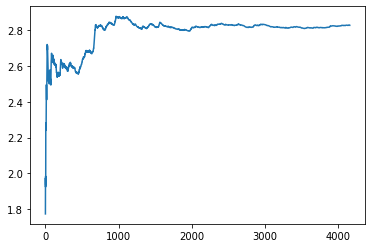

In [14]:
INSTANCE = "INSTANCE_4"
METHOD = "PT+WINQ+4"
simulate(INSTANCE, METHOD, trace_average_time = True)

In [15]:
"Tracé des temps de séjour sur la dernière réplication"

import matplotlib.pyplot as plt

plt.plot(sojourn_times)
plt.show()

NameError: name 'sojourn_times' is not defined

In [ ]:
"Tracé du temps moyen de séjour depuis le début, pour chaque produit, pour la dernière réplication"

cumulated_sojourn_time = 0
average_sojourn_time_last_run = []
data = []

for j in range(len(sys.products)):
    data.append((sys.products[j].arrival_time, sys.products[j].departure_time - sys.products[j].arrival_time))

sorted(data, key = lambda entry: entry[0])

for j in range(len(sys.products)):
    cumulated_sojourn_time += data[j][1]
    average_sojourn_time_last_run.append(cumulated_sojourn_time / (j+1))
    
plt.plot(average_sojourn_time_last_run)
plt.show()